In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Bước 1: Chuẩn bị dữ liệu
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
# Xử lý dữ liệu chuỗi trong cột 'Genre'
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})

# Chọn tất cả 5 cột
features = df[['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

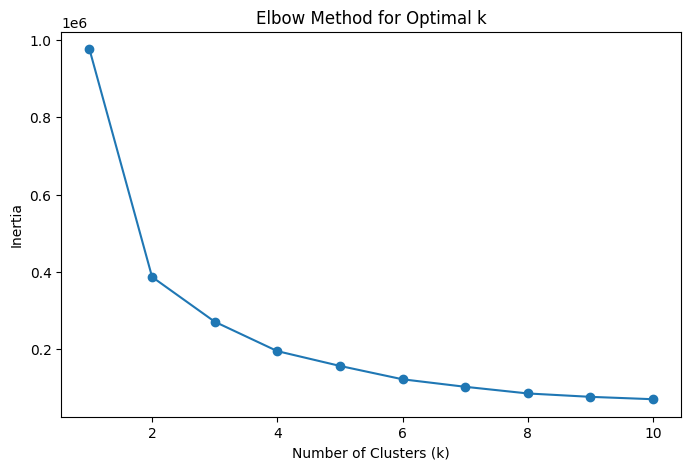

In [7]:
# Bước 2: Áp dụng K-means Clustering
# Chọn số cụm dựa trên Elbow Method
inertia_values = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    inertia_values.append(kmeans.inertia_)

# Vẽ đồ thị để chọn k
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [8]:
# Chọn số cụm dựa trên Elbow Method
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(features)

KMeans(n_clusters=5, random_state=42)

In [9]:
#Bước 3: Gán nhãn cụm và In kết quả
# Gán nhãn cụm cho mỗi dòng
df['Cluster'] = kmeans.labels_

In [10]:
# In ra các dòng dữ liệu với cột nhãn cụm
df[['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,1
1,2,0,21,15,81,1
2,3,1,20,16,6,4
3,4,1,23,16,77,1
4,5,1,31,17,40,4
...,...,...,...,...,...,...
195,196,1,35,120,79,2
196,197,1,45,126,28,3
197,198,0,32,126,74,2
198,199,0,32,137,18,3


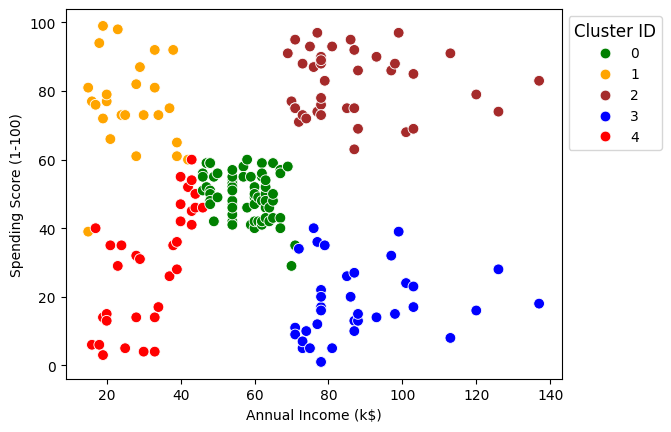

In [11]:
# Bước 4: Hiển thị kết quả với biểu đồ
# Vẽ biểu đồ Scatter plot bằng Seaborn
scatter = sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", s=60, palette=['green','orange','brown','blue','red'])

# Thêm ghi chú mã màu
legend = plt.legend(title='Cluster ID', loc='upper left', bbox_to_anchor=(1, 1))
legend.get_title().set_fontsize('12')

# Hiển thị biểu đồ
plt.show()

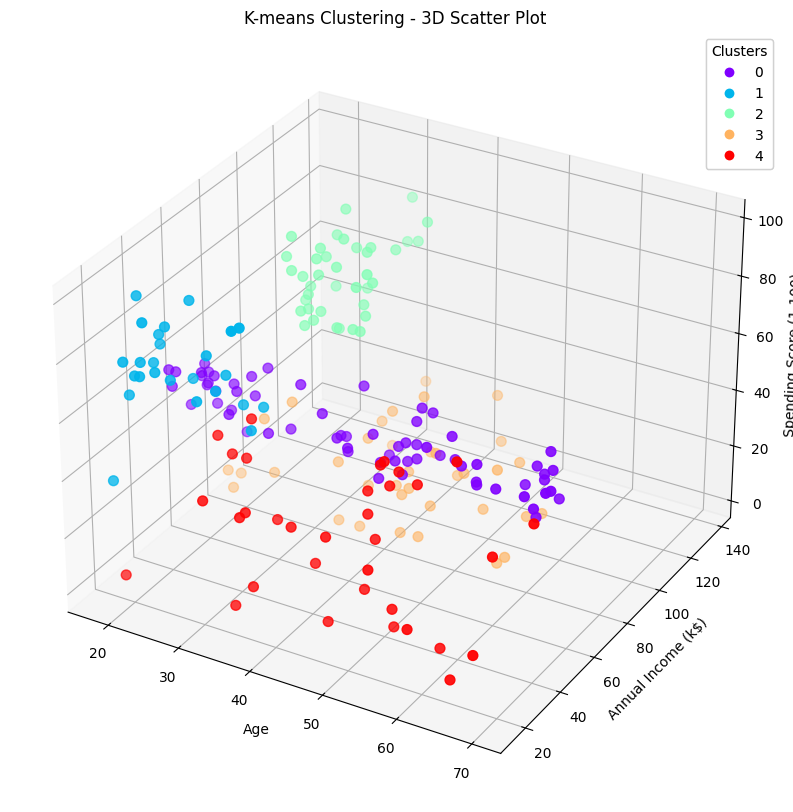

In [12]:
# Tạo biểu đồ 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Tạo mô hình scatter plot 3D
scatter = ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='rainbow', s=50)

# Tạo nhãn cho trục
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

# Tạo nhãn cho màu sắc của cụm
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Hiển thị biểu đồ
plt.title('K-means Clustering - 3D Scatter Plot')
plt.show()

In [12]:
# Lặp qua từng nhóm và in ID của khách hàng trong nhóm đó
for cluster_label in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster_label]
    customer_ids = cluster_data['CustomerID'].tolist()
    print(f'Cluster {cluster_label + 1} - Customer IDs: {customer_ids}')

Cluster 1 - Customer IDs: [59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 125, 127]
Cluster 2 - Customer IDs: [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 52]
Cluster 3 - Customer IDs: [124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200]
Cluster 4 - Customer IDs: [129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199]
Cluster 5 - Customer IDs: [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 48, 49, 50, 51, 5

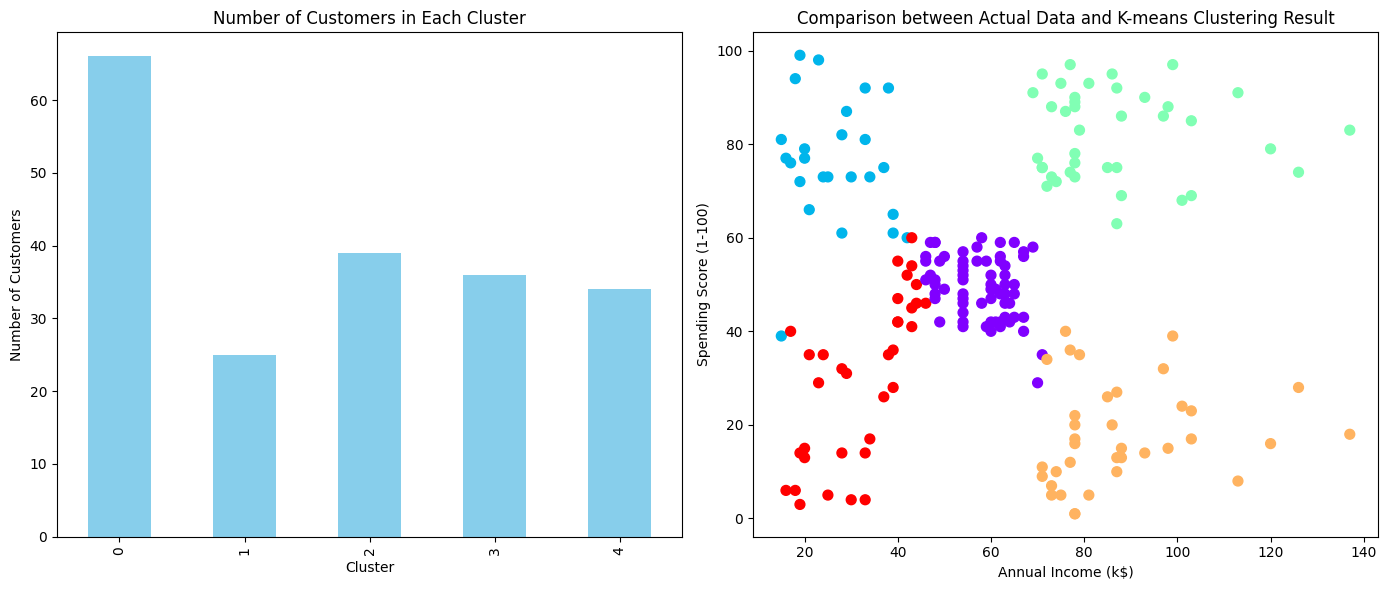

In [13]:
# Biểu đồ so sánh giữa K-means Clusters và Dữ liệu Thực tế
plt.figure(figsize=(14, 6))

# Biểu đồ 1: Biểu đồ dạng bar so sánh số lượng khách hàng trong từng nhóm
plt.subplot(1, 2, 1)
df['Cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')

# Biểu đồ 2: Biểu đồ scatter plot so sánh dữ liệu thực tế và kết quả phân loại
plt.subplot(1, 2, 2)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='rainbow', s=50)
plt.title('Comparison between Actual Data and K-means Clustering Result')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()